# Ein Template Matching Beispiel zum Laufen bekommen

[OpenCV imshow + Jupyter Notebook Problematik](https://medium.com/@mrdatainsight/how-to-use-opencv-imshow-in-a-jupyter-notebook-quick-tip-ce83fa32b5ad)

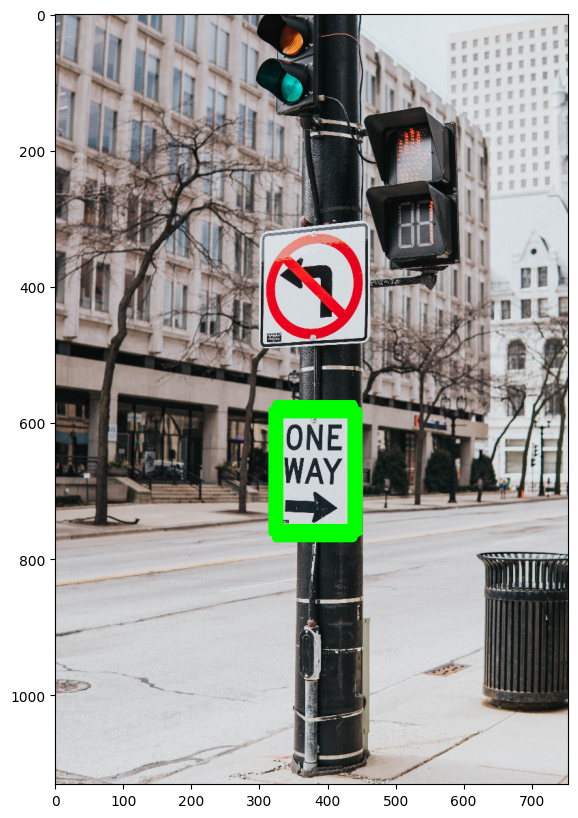

In [95]:
# Python program to illustrate
# template matching
import cv2
import numpy as np

SCALE_FACTOR = 0.2

# Read the main image
img_bgr = cv2.imread("bilder/traffic_scene.jpg")
img_bgr = cv2.resize(img_bgr, (0,0), fx=SCALE_FACTOR, fy=SCALE_FACTOR)

# Convert it to grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Read the template
template = cv2.imread("bilder/template_one_way.jpg", cv2.IMREAD_GRAYSCALE)
template = cv2.resize(template, (0,0), fx=SCALE_FACTOR, fy=SCALE_FACTOR)

# Perform match operations.
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
#res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
#res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF_NORMED)


# Specify a threshold
# 0.29693788
threshold_TM_CCOEFF_NORMED = 0.29  # Attention! And here comes the magic number!

# Store the coordinates of matched area in a numpy array
loc = np.where(res >= threshold_TM_CCOEFF_NORMED)
#threshold_TM_SQDIFF_NORMED = 0.22
#loc = np.where(res <= threshold_TM_SQDIFF_NORMED) # für Unähnlichkeitsmaße


# Store width and height of template in w and h
h,w = template.shape

# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0] + w, pt[1] + h), (0,255,0), 5)

# Show the final image with the matched area.
import matplotlib.pyplot as plt
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.figure( figsize=(10,10) )
plt.imshow(img_rgb)
plt.show()

In [15]:
res.min()

0.026004968

In [16]:
res.max()

1.0

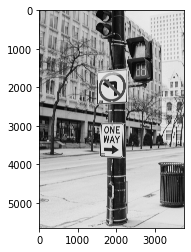

In [21]:
plt.imshow(img_gray, cmap="gray")
plt.show()

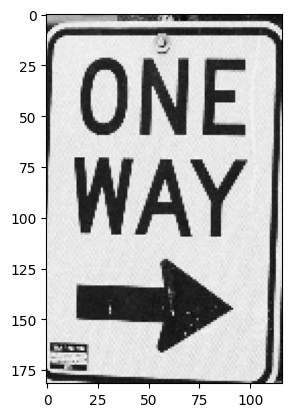

In [10]:
plt.imshow(template, cmap="gray")
plt.show()

In [9]:
template.shape

(182, 116)

In [2]:
loc

(array([422, 422, 423, 423, 423, 424, 424, 429, 429, 429, 430, 430, 430,
        430, 431, 431]),
 array([705, 706, 704, 705, 706, 705, 706, 659, 660, 661, 658, 659, 660,
        661, 659, 660]))

In [6]:
for pt in zip(*loc[::-1]):
    print(pt)

(705, 422)
(706, 422)
(704, 423)
(705, 423)
(706, 423)
(705, 424)
(706, 424)
(659, 429)
(660, 429)
(661, 429)
(658, 430)
(659, 430)
(660, 430)
(661, 430)
(659, 431)
(660, 431)


# Visualisieren der Template Matching Ergebnisse

In [23]:
type( res )

numpy.ndarray

In [24]:
res.shape

(4742, 3191)

In [25]:
res.min()

-0.25346318

In [26]:
res.max()

0.9997157

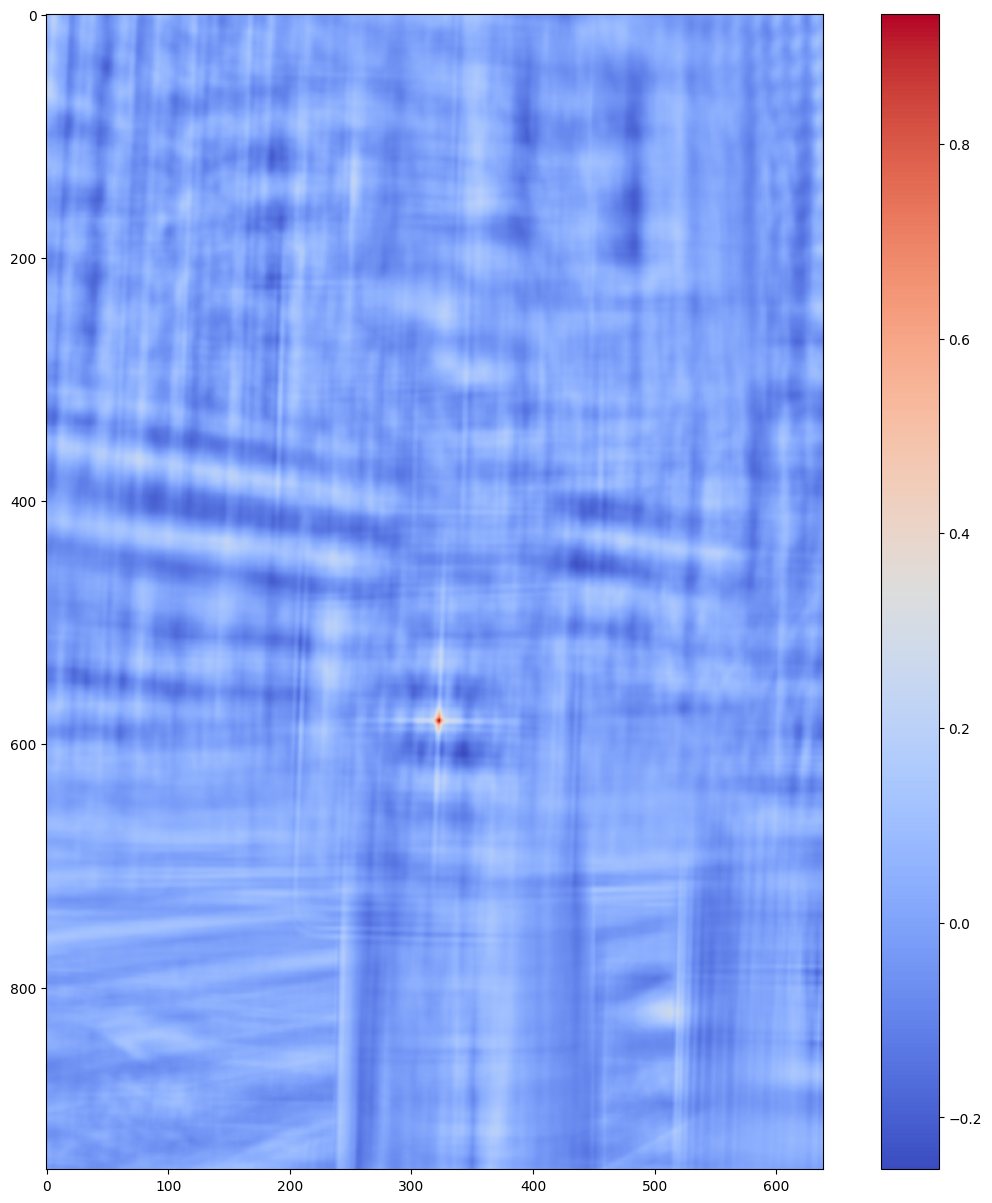

In [96]:
plt.figure( figsize=(15,15) )
plt.imshow(res, cmap="coolwarm")
plt.colorbar()
plt.show()

# Exkurs: Korrelation

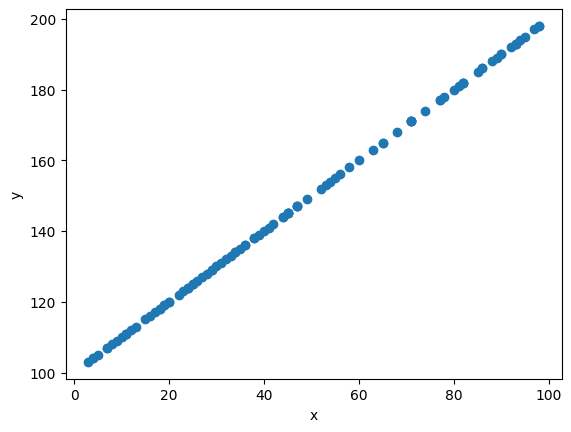

corrcoef =
 [[1. 1.]
 [1. 1.]]


In [62]:
import numpy
N = 100
x = numpy.random.randint(1,100, size=N)
y = 100 + x #+ numpy.random.randint(1,20, size=N)

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("corrcoef =\n", numpy.corrcoef(x,y))

# Beispiel: Korrelationskoeffizient für 2 Bildstrukturen

In [81]:
x = np.array([[0,200,255,
               0,200,255,
               0,200,255]]).reshape(3,3)

y = np.array([[0,200,255,
               0,200,255,
               0,200,255]]).reshape(3,3)
y = y * 2.0

In [82]:
x.ndim

2

In [83]:
x.shape

(3, 3)

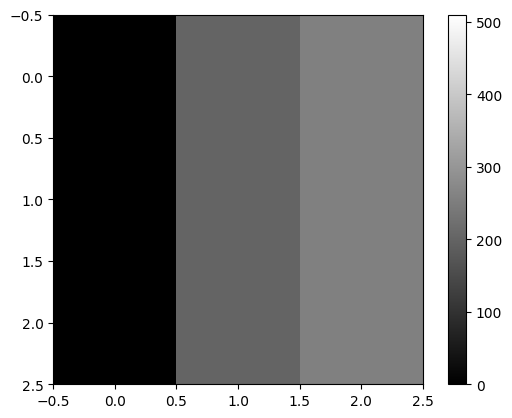

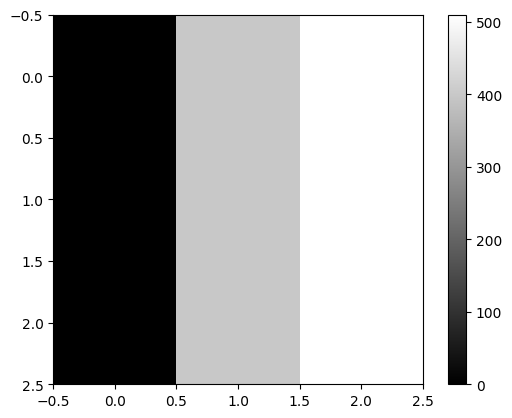

In [86]:
plt.imshow(x, cmap="gray", vmin=0, vmax=510)
plt.colorbar()
plt.show()

plt.imshow(y, cmap="gray", vmin=0, vmax=510)
plt.colorbar()
plt.show()

In [87]:
x

array([[  0, 200, 255],
       [  0, 200, 255],
       [  0, 200, 255]])

In [88]:
y

array([[  0., 400., 510.],
       [  0., 400., 510.],
       [  0., 400., 510.]])

In [89]:
x.flatten()

array([  0, 200, 255,   0, 200, 255,   0, 200, 255])

In [90]:
y.flatten()

array([  0., 400., 510.,   0., 400., 510.,   0., 400., 510.])

In [92]:
summe = 0
for (a,b) in zip(x.flatten(), y.flatten()):
    summe = (a-b)**2
print("R=", summe)

R= 65025.0


In [94]:
np.corrcoef(x.flatten(), y.flatten())

array([[1., 1.],
       [1., 1.]])